<a href="https://colab.research.google.com/github/YefridC09/ST-554_Big_data_analysis/blob/main/HW4_Yefrid_Cordoba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4

# Yefrid Cordoba

## Code from homework 3

### Reading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
students_data = pd.read_csv('https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt',
                            sep = ';')
students_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Summarizing data

In [2]:
students_data.isnull().sum() # Validate that there are no missing values for any of variables

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [3]:
students_data.school.value_counts() #one-way contingency table

,count
school,
GP,349
MS,46


In [4]:
#convert sex variable
students_data["sex1"] = students_data.sex.astype("category")
students_data.sex1 = students_data.sex1.cat.rename_categories(["Female", "Male"])
#convert school variable
students_data["school1"] = students_data.school.astype("category")
students_data.school1 = \
    students_data.school1.cat.rename_categories(["Gabriel Pereira",
                                                 "Mousinho da Silveira"])


In [5]:
two_way = pd.crosstab(
    students_data.school1,
    students_data.sex1,
    rownames = ["School"],
    colnames = ["Sex"]
) #Two-way contingency table

## Task 1

[Text(0.5, 0, 'School'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Stacked bar plot for count of males and females from each school')]

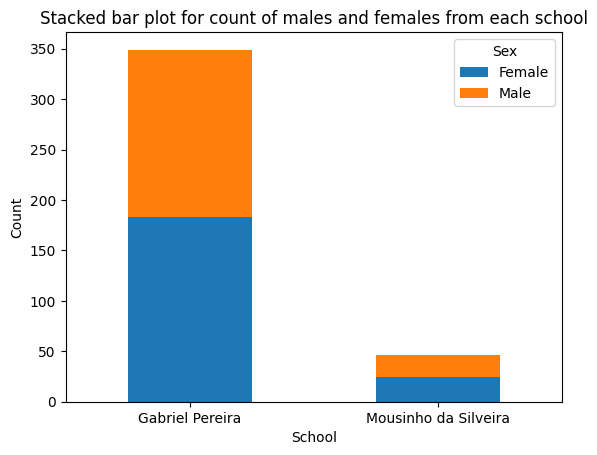

In [6]:
#Stacked bar plot
two_way.plot.bar(stacked = True,rot = 0).\
    set(xlabel = 'School', ylabel = 'Count',
        title = 'Stacked bar plot for count of males and females from each school')

[Text(0.5, 0, 'School'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Side-by-side bar plot for count of males and females from each school')]

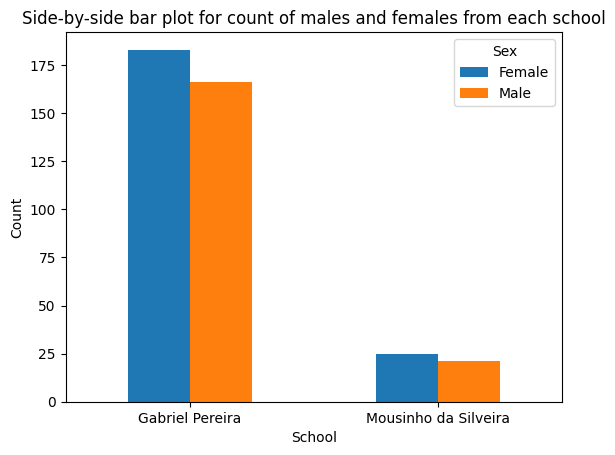

In [7]:
#Stacked bar plot
two_way.plot.bar(rot = 0).\
    set(xlabel = 'School', ylabel = 'Count',
        title = 'Side-by-side bar plot for count of males and females from each school')

Approximately 50% of students at Gabriel Pereira School are male, and the same pattern is observed at Mousinho da Silveira School.

/tmp/ipython-input-253883978.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  students_data.hist(column = "G3", by = "sex1", bins = 15)


Text(0, 0.5, 'Final Grade')

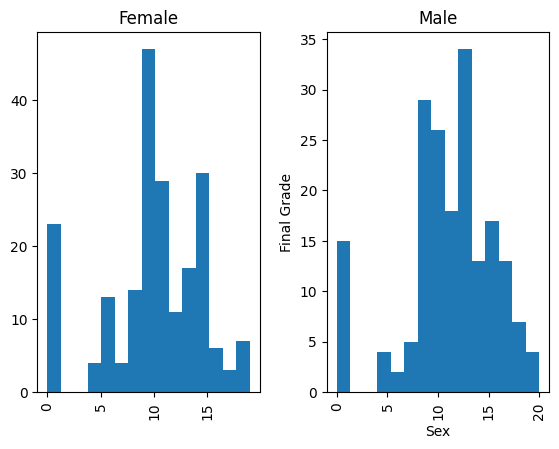

In [8]:
students_data.hist(column = "G3", by = "sex1", bins = 15)
plt.xlabel("Sex")
plt.ylabel("Final Grade")

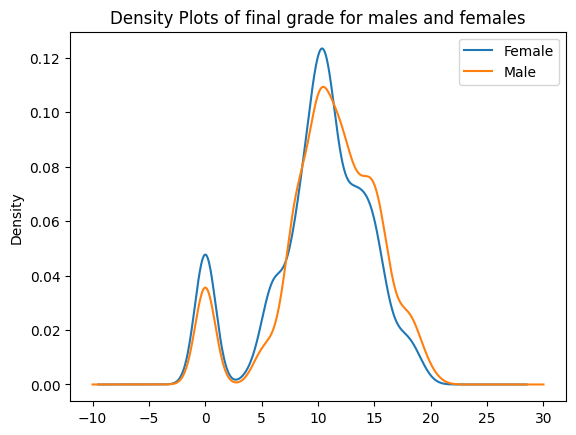

In [9]:
students_data.loc[students_data.sex1 == 'Female'].G3.plot.density(bw_method = 0.2, label = "Female",
                                  title = "Density Plots of final grade for males and females")
students_data.loc[students_data.sex1 == 'Male'].G3.plot.density(bw_method = 0.2, label = "Male")
plt.legend()

Text(0, 0.5, 'Final Grade')

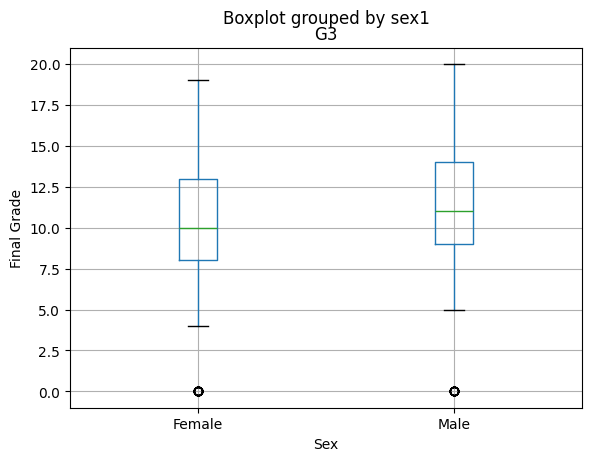

In [10]:
students_data.boxplot(column = "G3", by = "sex1")
plt.xlabel("Sex")
plt.ylabel("Final Grade")


Males tend to have a slightly higher final grade

(187,)
(208,)


[Text(0.5, 0, 'Age')]

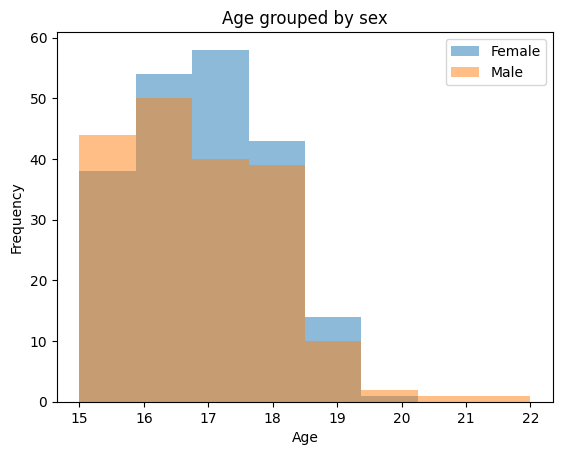

In [11]:
sub_male = students_data.loc[students_data.sex1 == 'Male', 'age'] #Filtering age by sex
sub_female = students_data.loc[students_data.sex1 == 'Female', 'age'] #Filtering age by sex
print(sub_male.shape)
print(sub_female.shape)
sub_male = pd.concat([sub_male, pd.Series([np.nan for _ in range(21)])])
sub_male
plot_data = pd.DataFrame(zip(sub_female, sub_male), columns = ["Female", "Male"])
plot_data.plot.hist(alpha = 0.5, bins = 8, title = 'Age grouped by sex').set(xlabel = 'Age')
#print(sub_male.shape)
#students_data.loc[students_data.sex1 == 'Female', 'age'].plot.hist(alpha = 0.5, bins = 5, label = "Female")
#students_data.loc[students_data.sex1 == 'Male', 'age'].plot.hist(alpha = 0.5, bins = 5,label = "Male")
#plt.legend()

Males tend to have a lower age than females who participated in the study

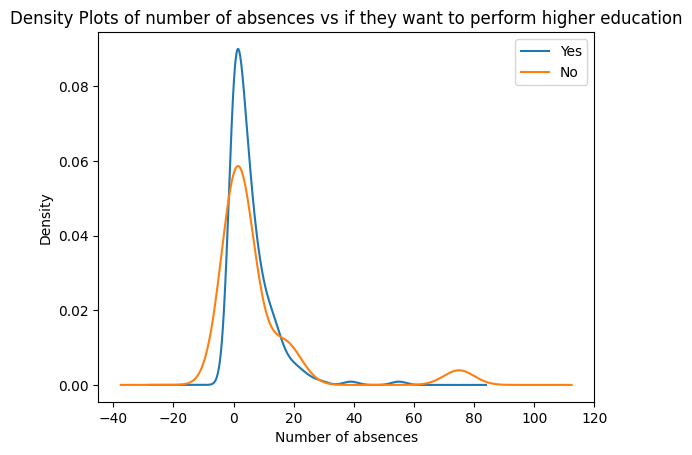

In [12]:
students_data.loc[students_data.higher == 'yes'].absences.plot.density(bw_method = 0.3, label = "Yes",
                                  title = "Density Plots of number of absences vs if they want to perform higher education")
students_data.loc[students_data.higher == 'no'].absences.plot.density(bw_method = 0.3, label = "No").\
set(xlabel = 'Number of absences')
plt.legend()

It is shown that the density in the number of absences is lower among students who intend to pursue higher education, whereas students who don't intend to pursue higher education exhibit a greater spread of absences.

Text(0, 0.5, 'First period grade')

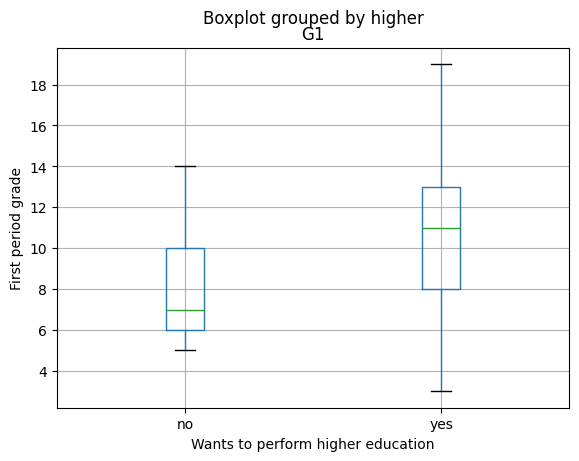

In [13]:
students_data.boxplot(column = "G1", by = "higher")
plt.xlabel("Wants to perform higher education")
plt.ylabel("First period grade")


Students who want to pursue higher education have higher median first-period grades than those who do not; however, the distributions are broader, whereas students who don't want to pursue higher education exhibit lower median and a narrower spread.

[Text(0.5, 0, 'Number of absences'),
 Text(0, 0.5, 'Final grade'),
 Text(0.5, 1.0, 'Final grades as a function of the number of absences grouped by sex')]

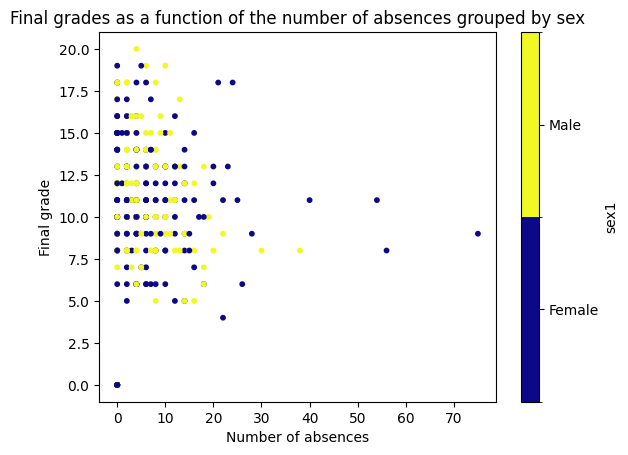

In [14]:
students_data.plot.scatter(x = "absences", y = "G3", c = "sex1", cmap = "plasma", s = 10).\
set(xlabel = 'Number of absences',
    ylabel = 'Final grade',
    title = 'Final grades as a function of the number of absences grouped by sex')
#

As the number of absences increases, the final grade decreases not proportionally for males and females.

[Text(0.5, 0, 'First period grade'),
 Text(0, 0.5, 'Final grade'),
 Text(0.5, 1.0, 'Final grades as a function of the first period grades, grouped by school')]

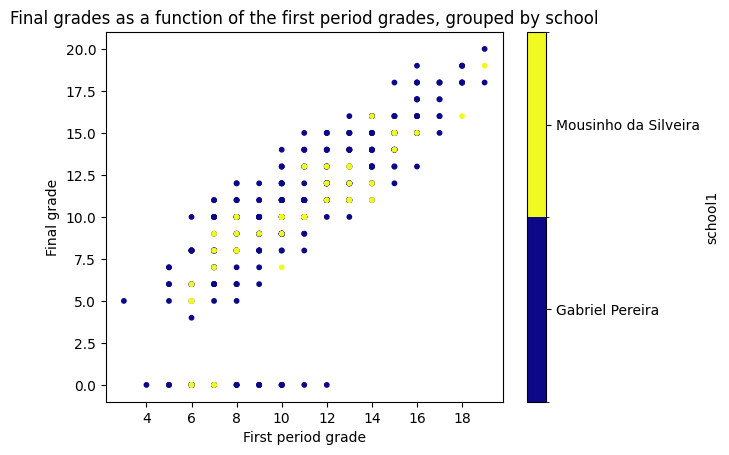

In [15]:

#s for size (should be a numeric column), cmap can be used with c for specifying color scales
students_data.plot.scatter(x = "G1", y = "G3", c = "school1", cmap = "plasma", s = 10).\
set(xlabel = 'First period grade',
    ylabel = 'Final grade',
    title = 'Final grades as a function of the first period grades, grouped by school')
#

The trend indicates a linear relationship between first-period grades and final grades, and evidence that students who perform well in the first period tend to perform well throughout the school year.

# Plotting the NFL data

## Task 1

In [16]:
nfl_data = pd.read_csv('https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv')
nfl_data.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


In [17]:
#Converting to category the variables asked
nfl_data.homeTeam = nfl_data['homeTeam'].astype("category")
nfl_data.awayTeam = nfl_data['awayTeam'].astype("category")
nfl_data.day = nfl_data['day'].astype("category")
nfl_data.stadium = nfl_data['stadium'].astype("category")
nfl_data.startTime = nfl_data['startTime'].astype("category")
nfl_data.toss = nfl_data['toss'].astype("category")
nfl_data.roof = nfl_data['roof'].astype("category")
nfl_data.surface = nfl_data['surface'].astype("category")
nfl_data.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


## Task 2

In [18]:
 #Creating list of elements that we are going to keep
reg_s = ['1', '2', '3', '4', '5', '6', '7', '8', '9', \
         '10', '11', '12', '13', '14', '15', '16', '17']
nflreg_data = nfl_data[nfl_data.week.isin(reg_s)] #Filtering using the list
nflreg_data.week = nflreg_data['week'].astype("int64")
nflreg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3328 entries, 0 to 3459
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   week             3328 non-null   int64   
 1   date             3328 non-null   object  
 2   day              3328 non-null   category
 3   season           3328 non-null   int64   
 4   awayTeam         3328 non-null   category
 5   AQ1              3328 non-null   int64   
 6   AQ2              3328 non-null   int64   
 7   AQ3              3328 non-null   int64   
 8   AQ4              3328 non-null   int64   
 9   AOT              3328 non-null   int64   
 10  AOT2             3328 non-null   int64   
 11  AFinal           3328 non-null   int64   
 12  homeTeam         3328 non-null   category
 13  HQ1              3328 non-null   int64   
 14  HQ2              3328 non-null   int64   
 15  HQ3              3328 non-null   int64   
 16  HQ4              3328 non-null   int64   
 17  

/tmp/ipython-input-3168614487.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nflreg_data.week = nflreg_data['week'].astype("int64")


In [19]:
pd.pivot_table(nflreg_data, values = 'AFinal', index = ["season", "week"],\
 aggfunc = ['mean', 'median', 'std' ])#Data mean, median and standard deviation summary grouped by season and week

mean median        std
                AFinal AFinal     AFinal
season week                             
2002   1     23.125000   23.0   9.680737
       2     22.687500   23.5  12.354318
       3     19.571429   22.0  11.765100
       4     18.928571   19.0   8.939663
       5     24.000000   23.0  10.355229
...                ...    ...        ...
2014   13    20.687500   20.0   9.470788
       14    27.062500   24.5   9.698582
       15    18.000000   13.5   8.899438
       16    22.875000   22.0  10.052363
       17    20.812500   17.0  11.438058

[221 rows x 3 columns]

In [20]:
pd.pivot_table(nflreg_data, values = 'AFinal', index = "season",\
 aggfunc = ['mean', 'median', 'std' ])#Data mean, median and standard deviation summary grouped by season

,mean,median,std
,AFinal,AFinal,AFinal
season,,,
2002,20.550781,20.5,10.064759
2003,19.054688,19.0,10.251970
2004,20.230469,19.0,10.175596
2005,18.792969,19.0,9.948894
2006,20.234375,21.0,10.386254
2007,20.253906,20.0,10.703215
2008,20.750000,20.0,10.420944
2009,20.363281,20.0,10.672526


In [21]:
pd.pivot_table(nflreg_data, values = 'AFinal', index = "week",\
 aggfunc = ['mean', 'median', 'std' ])#Data mean, median and standard deviation summary grouped by week

,mean,median,std
,AFinal,AFinal,AFinal
week,,,
1,19.716346,20.0,8.977768
2,19.545894,20.0,10.433170
3,20.767677,23.0,9.634781
4,20.983696,20.0,10.062361
5,20.527473,20.5,10.300824
6,20.679558,20.0,10.270079
7,21.111111,20.0,10.674927
8,20.151685,20.0,9.782639


Text(0, 0.5, 'Average yards')

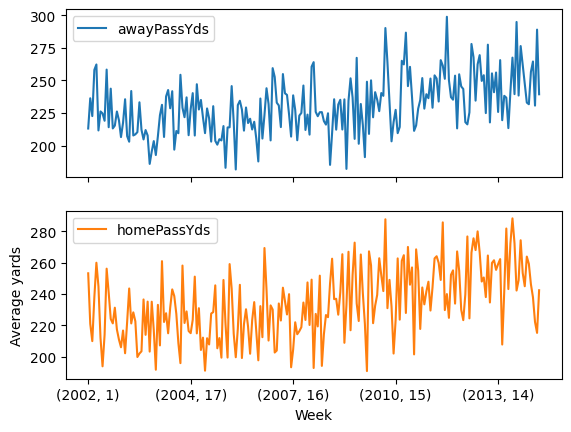

In [22]:
nflreg_data.groupby(["season", "week"])\
 [["awayPassYds", "homePassYds"]].mean().plot.line(subplots = True)
    #Data mean grouped by week
plt.xlabel('Week')
plt.ylabel('Average yards')


The graph shows substantial noise; however, it is evident that, regardless of whether it is the home or the away team,the average passing yards have increased over time.

[Text(0.5, 0, 'Week'), Text(0, 0.5, 'Average yards')]

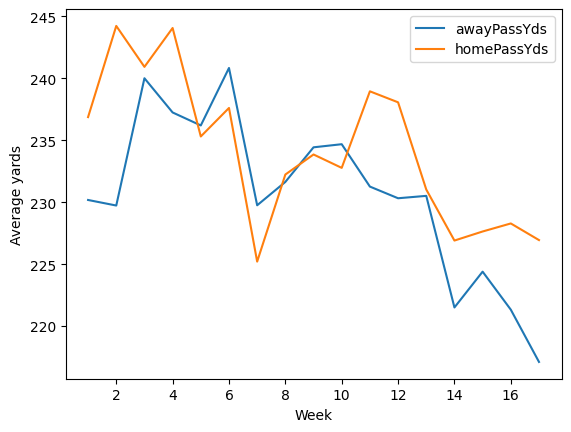

In [23]:
nflreg_data.groupby(["week"])\
 [["awayPassYds", "homePassYds"]].mean().plot.line()\
 .set(xlabel = 'Week', ylabel = 'Average yards')#Data mean passing yards over week


It is evident that for both the away and home teams, average passing yards decline later in the season.

[Text(0.5, 0, 'Week'), Text(0, 0.5, 'Average yards')]

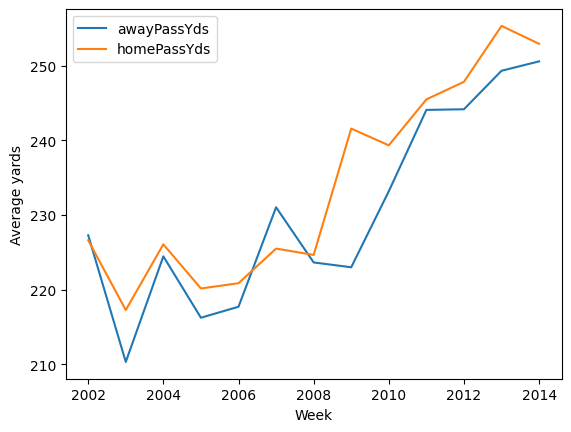

In [24]:
nflreg_data.groupby(["season"])\
 [["awayPassYds", "homePassYds"]].mean().plot.line()\
 .set(xlabel = 'Week', ylabel = 'Average yards')#Data mean passing yards over seasons

Based on the graph, the passing yards for both of the teams has increased overtime. Even when the average decreases at the end of each season (*see previous graph*).

In [75]:
import time
from functools import wraps
#Adding the function to time the execution of our graph function
def timeit(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.perf_counter()
        result = func(*args, **kwargs)
        end = time.perf_counter()
        elapsed = end - start
        print(f"{func.__name__} ran in {elapsed:.6f} seconds")
        return result
    return wrapper

In [115]:
@timeit
def graph(Data : pd.DataFrame, var: list[str], Group: list[str], stat: list[str]):
    '''
    This function will take a pandas dataframe, graph the especified statistic from
    the series especified in var, while grouping it by the specified list of groups.
    '''
    #for i in range(len(var)):
    Data.groupby(Group)\
    [var].agg(stat).plot.line()\
    .set(xlabel = Group, ylabel = var)
    #Data.groupby(["season"])\
 #[[var]].mean().plot.line()
    return None

graph ran in 0.031205 seconds


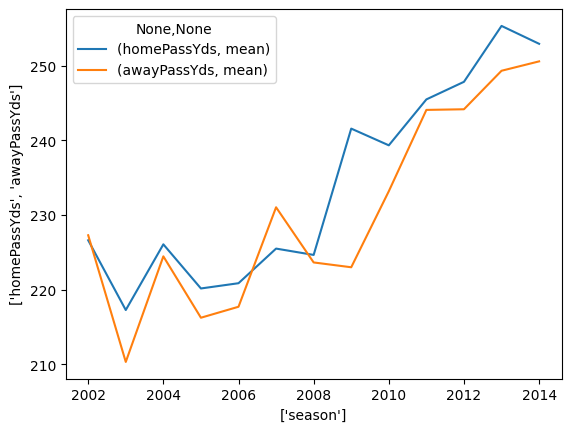

In [120]:
graph(nflreg_data, ["homePassYds", "awayPassYds"], ["season"], [ 'mean'])


Testing the code with the same input variables than making the graph manually, we can se that the data match and we get to the conclusion that across seasons, the passing yards has increased.

graph ran in 0.026689 seconds


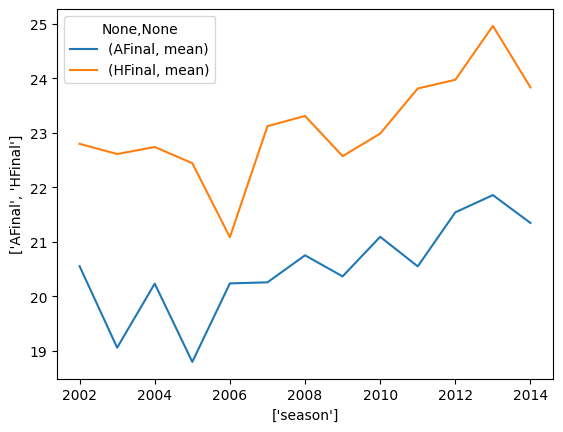

In [122]:
graph(nflreg_data, ["AFinal", "HFinal"], ["season"], [ 'mean'])

On average, the home team reached a higher final score across the seasons

graph ran in 0.026750 seconds


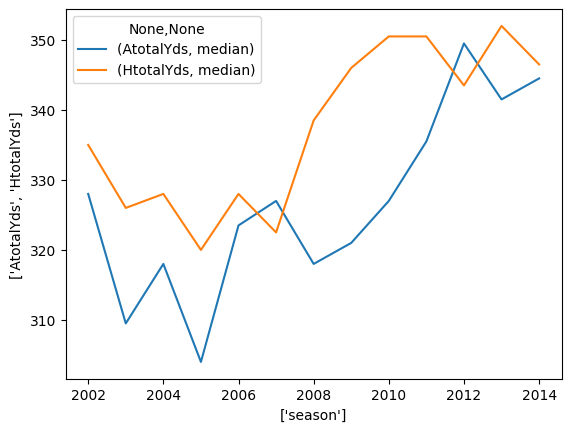

In [129]:
graph(nflreg_data, ["AtotalYds", "HtotalYds"], ["season"], [ 'median'])

The median total yards is in general higher for the home team than that for the away team across the seasons